
# End-to-end Machine Learning project - Regression


Adopted from fantastic book Handson Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron. Now in 3rd edition.

![Handson Machine Learning](https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/img/Hands_on_3rd.jpg?raw=true)


[Amazon link](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1098125975)

*This notebook contains all the sample code and solutions to the exercises in chapter 2.*

## Interactive Cloud based Notebooks

If you have not opened this open interactively (locally or through tool such as Colab, you can do so below through one of the links). Google account required for interactivity.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/notebooks/day5_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/notebooks/day5_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## Main Steps of End-to-End Machine Learning Project

Aurelien defines them similarly to how we've defined them in general analysis.

1. Look at the big picture.
2. Get the data.
3. Explore and visualize the data to gain insights.
4. Prepare the data for machine learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## Basic regressor - how to predict numeric values

* https://scikit-learn.org/stable/index.html - Regression prediction continuous values

In [1]:
import pandas as pd # for work with Dataframes - tables
import numpy as np # underlaying library for matrices - pandas and everyone else use this
import matplotlib.pyplot as plt # visualization

In [2]:
## let's make a dataframe that will contain numbers 0 to 10 as X column
# y column will contain f(x) = 3x + 5 -0.5 + random(0 to 1) for noise
train_df = pd.DataFrame() # empty Dataframe
train_df["X"] = np.arange(11) # numbers from 0 to 10 (11 is not included)
# could add specific seed here to make pseudo-random selection
# let's set specific seed
np.random.seed(2026) # so any number would work
train_df["y"] = 3 * train_df["X"] + 5 - 0.5 + np.random.rand(11)
# np.random.rand(11) means that I want 11 random numbers with potential values(including) to 1 (excluding0)
# there is also randint  for integers in numpy
# head
train_df.head(15)


,X,y
0,0,4.719346
1,1,7.913012
2,2,11.476635
3,3,13.588899
4,4,16.979290
5,5,20.487550
6,6,22.698141
7,7,26.411715
8,8,29.058250
9,9,32.283229


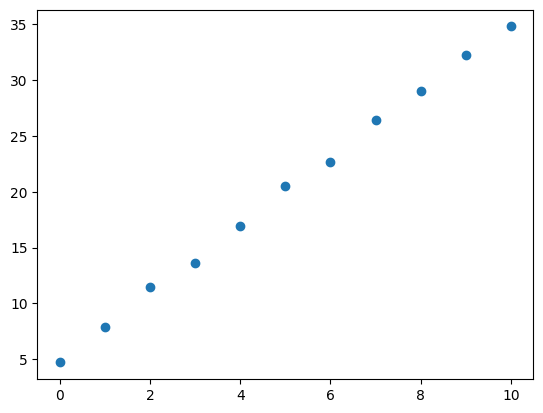

In [3]:
# let's scatter plot our X and y
plt.scatter(train_df["X"], train_df["y"])
plt.show()

In [5]:
# let's use LinearRegressor to find intercept and coef
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # so instance of untrained LinearRegressor
lin_reg.fit(train_df[["X"]], train_df["y"]) # note again double square brackets for X column for 2d matrix, because we only have a single x so x1 so to say for each row
# since this is a linear regressor we can actually get the formula
# for y = ax + b
print(lin_reg.coef_, lin_reg.intercept_) # so intercept would be b and coefficient would be a
# note how coefficient is given with [] because we could potentially had multiple columns with x1, x2 etc

[3.01823503] 4.946874371773323


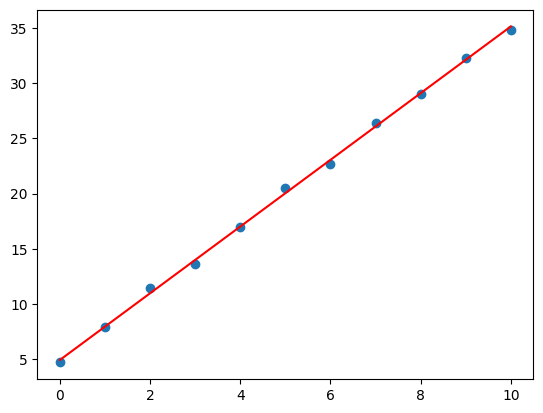

In [6]:
# let's plot both points and line
plt.scatter(train_df["X"], train_df["y"]) # so train_df[y] is ground truth
plt.plot(train_df["X"], lin_reg.predict(train_df[["X"]]), color="red") # while lin_reg.predict(train_df[["X"]]), are the predicted value
plt.show()

In [7]:
# let's create a dataframe with single value of X which is 100
test_df = pd.DataFrame({"X": [100]})
test_df.head()

,X
0,100


In [8]:
# so let's pass single X value of 100 to the mode and predict the y
lin_reg.predict(test_df[['X']]) # again note the double brackets because we could have had multiple values

array([306.77037724])

In [9]:
# let's try passing a value by hand using Python list of lists
# let's predict value when x is 200
lin_reg.predict([[200]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([608.59388012])

In [10]:
# so let's create a simple DataFrame with 3 values 100, 200, 300 in X column
test_df = pd.DataFrame({"X": [-100, 0, 100, 200, 300]})
test_df.head()

,X
0,-100
1,0
2,100
3,200
4,300


In [11]:
# how about predicting multiple values at once say 100, 200, 300
# so i make a new column in the test_df dataframe (table)
test_df['y'] = lin_reg.predict(test_df[['X']])
test_df.head()

,X,y
0,-100,-296.876629
1,0,4.946874
2,100,306.770377
3,200,608.593880
4,300,910.417383


In [12]:
# we could also use the coefficiens directly
a = lin_reg.coef_[0]
b = lin_reg.intercept_
print(f"y = {a}x + {b}")

y = 3.0182350287245576x + 4.946874371773323


In [13]:
# let's add y_calc columns to our test_df
test_df["y_calc"] = a * test_df["X"] + b
test_df.head()

,X,y,y_calc
0,-100,-296.876629,-296.876629
1,0,4.946874,4.946874
2,100,306.770377,306.770377
3,200,608.593880,608.593880
4,300,910.417383,910.417383


In [ ]:
# so for our linear regressor we could actually find the formula ourselves and use it directly
# for more complex models it will not be practical or even feasible ! :)

## Look at the big picture -> Frame the Problem

### Frame the Problem

- **Clarify business objective**  
  - Building a model is not the end goal; understand how the company will use it.  
  - In this case, predictions of district median housing prices will feed into another ML system that guides investment decisions.  

- **Understand the impact**  
  - Getting predictions right directly affects company revenue.  

- **Check existing solutions**  
  - Currently done manually by experts using complex rules.  
  - Costly, time-consuming, and often off by 30% or more.  

- **Identify available data**  
  - Census dataset includes median housing prices and related district data.  
  - Provides a solid foundation for supervised learning.  

- **Recognize pipeline context**  
  - Predictions are part of a larger data pipeline.  
  - Pipelines improve modularity and robustness but require monitoring to avoid stale data.  

- **Define the ML problem type**  
  - **Supervised learning**: labeled data available (district prices). Contrast with unsupervised learning (Clustering to group districts without regard to price)  
  - **Regression task**: predict a continuous value (median housing price). Contrast with Classification (Buy, Hold, Avoid for example)  
  - **Multiple regression**: uses multiple features (population, income, etc.).  
  - **Univariate regression**: predicts one target per district.  (Contrast with Multivariate regression - multiple answers)
  - **Batch learning**: sufficient since data is static and fits in memory. Contrast with Online Learning - data comes in continuously  


## Performance Measure

Goal - RMSE (Root Mean Square Error) under 30 % (because manually we get 30% at the moment)

In [14]:
print("Welcome to Machine Learning!")

Welcome to Machine Learning!


This project requires Python 3.7 or above:

In [15]:
import sys
print(f"Python version {sys.version}")

assert sys.version_info >= (3, 7) # so this would stop the notebook if you have really old Python 3.6 or below

Python version 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


It also requires Scikit-Learn ≥ 1.0.1:

In [16]:
from packaging import version
import sklearn # this is our big machine learning library

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
print(f"sklearn version is {sklearn.__version__}")

sklearn version is 1.6.1


## Current Scikit Learn Version

You can find current scikit learn version at two places:

* Official Site: https://scikit-learn.org/stable/index.html
* Pypi (from official Python package repository): https://pypi.org/project/scikit-learn/

In [ ]:
# if I needed some latest feature offered by latest scikit version
# then I could install it using ! syntax
# !pip install scikit-learn
# then you might need to restart kernel - restart session and you will have the install

# Get the Data

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

## Download the Data

In [17]:
from pathlib import Path
import pandas as pd
import tarfile # Python standard library supports tarfiles
import urllib.request

def load_housing_data(url="https://github.com/ageron/data/raw/main/housing.tgz", dst_folder="datasets"):
    tarball_path = Path(dst_folder) / "housing.tgz" # TODO get file name automatically from URL
    if not tarball_path.is_file():
        Path(dst_folder).mkdir(parents=True, exist_ok=True) #makes folder if it does not exist
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path=dst_folder)
    return pd.read_csv(Path(dst_folder) / "housing" / "housing.csv")

# so we run the above function
housing = load_housing_data() # housing should contain Dataframe with our data

/tmp/ipython-input-2687824558.py:12: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path=dst_folder)


In [18]:
# if I already had data on my Google Drive I could mount it as such
from google.colab import drive
drive.mount('/content/drive')
# then I could access it from /content/drive/MyDrive and then whatever the actual file or subfolder follows

Mounted at /content/drive


## Take a Quick Look at the Data Structure

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
# let's see shape of our dataframe
print(f"Our housing is shaped {housing.shape}")

Our housing is shaped (20640, 10)


In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
# what is happening with our column that consists of objects ("string")
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [24]:
housing.describe() # again describe in Pandas is great for getting basics stats for numerical values by default

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [26]:
# we can save the results of describe to xlsx or csv because describe() gives us a new dataframe
# we save to Google Colab instance
# housing.describe().to_csv("housing_describe.csv")
# let's save to Google Drive that I mounted where I have Classroom subfolder
# so you need to Mount your Google Drive first
# then you need to know where you want to save in my case Classroom subfolder
housing.describe().to_csv("/content/drive/MyDrive/Classroom/housing_describe.csv")
housing.describe().to_excel("/content/drive/MyDrive/Classroom/housing_describe.xlsx")
# to xlsx on server - this will be GONE when session / kernel is killed
housing.describe().to_excel("housing_describe.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:
# let's sum population to see how much population census covered
housing["population"].sum() # so california in 1990 had around 30 Million population which actually is pretty close to other sources

np.float64(29421840.0)

The following cell is not shown either in the book. It creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [27]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Visualizating data

Again describe and basics stats might not tell the whole story.

It is better to visualize to see if basics stats missed something obvious.

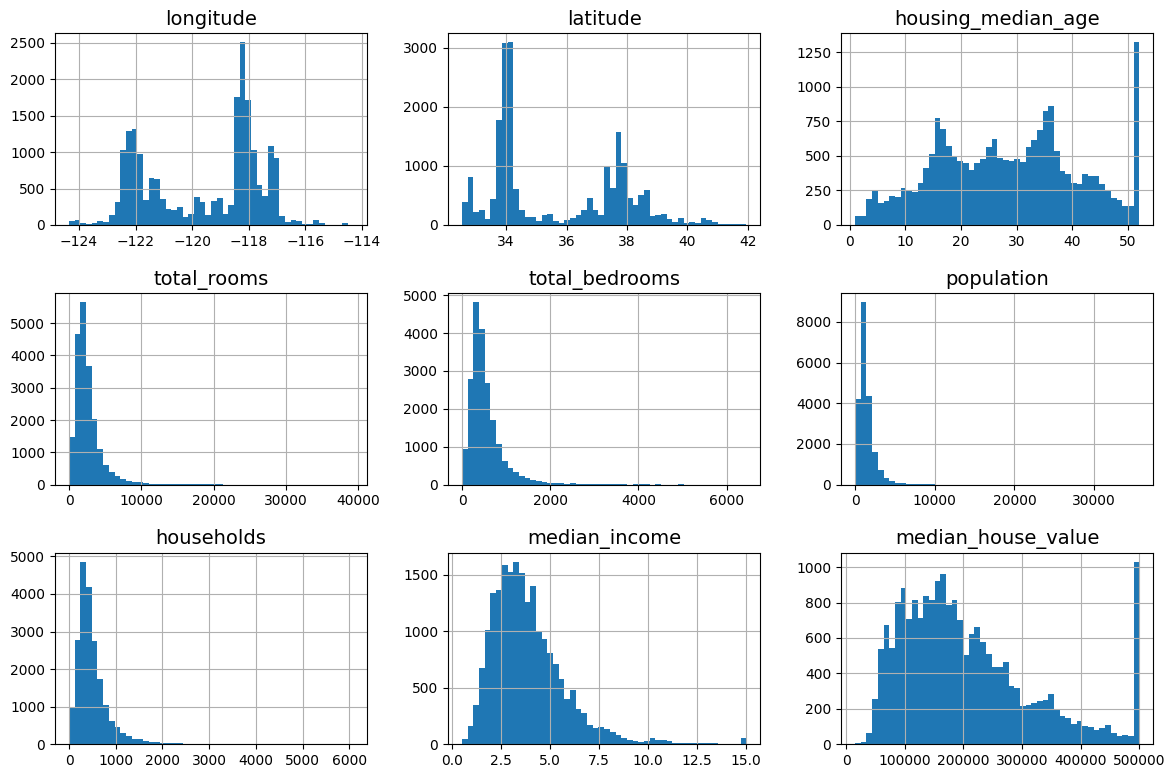

In [28]:
import matplotlib.pyplot as plt # this was already imported so not required

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# we will use pandas built in integration with matplotlib to genereate histograms for all quantitative columns
housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Anomalies in Histograms

* longitue and latitue peaks correspond to San Francisco and Los Angeles basins with high population
* we have multiple colums with cutoffs, meaning all values past some value are considered the same, median_age > 51, median_income > 1.5 (150000), and
* crucially our y - median_house_value everything over 500k is considered 500k, this will limit our model performance

## Create a Test Set

When building a model it is crucial to set aside a test set - to avoid overfitting.

Also we want to avoid so called "data snooping bias" - idea that our human pattern recognition might lead us to select wrong model based on our human misconception.

We want our model to be generalize well.

In [29]:
# these next few cells show how you could do this by hand
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    # idea is simply to shuffle the data first then take first n as test and rest as train
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# above function is not really needed if we use scikit learn

In [30]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [31]:
len(test_set)

4128

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [ ]:
np.random.seed(42) # so any number would work

Sadly, this won't guarantee that this notebook will output exactly the same results as in the book, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

## Idea to consistently split into test and train

So if we do not have a normal range for our unique ids (say 1 to something ) we can generate them from one or more of our features that uniquely define our row of data.

Then we can use some hash function to transform these features into a unique id with specific range (say 1 to 4billion) to consistently split the rows.

Note: another source of randomness is the order of Python sets: it is based on Python's `hash()` function, which is randomly "salted" when Python starts up (this started in Python 3.3, to prevent some denial-of-service attacks). To remove this randomness, the solution is to set the `PYTHONHASHSEED` environment variable to `"0"` _before_ Python even starts up. Nothing will happen if you do it after that. Luckily, if you're running this notebook on Colab, the variable is already set for you.

In [32]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [33]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [34]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

### Advice - use train_test_split from scikit learn instead

In [36]:
from sklearn.model_selection import train_test_split
# unlike our classification task , for now we leave the inputs and answers in both train and test together, we can split them off later
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=2026)

In [37]:
# shape of train and test set ?
print(f"train_set shape {train_set.shape}")
print(f"test_set shape {test_set.shape}")
#

train_set shape (16512, 10)
test_set shape (4128, 10)


In [38]:
## how many missing bedroom features do we have?
test_set["total_bedrooms"].isnull().sum()

np.int64(47)

### Stratified Sampling


To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). The `cdf()` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [39]:
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)
# so about 10 % chance we are off too much

0.10736798530929942


If you prefer simulations over maths, here's how you could get roughly the same result:

In [40]:
# extra code – shows another way to estimate the probability of bad sample

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

np.float64(0.1071)

### Feature Engineering Categorical

#### Transforming Numerical Columns to Categorical

Our goal here (after talking with housing experts) is to have stratified representation of different median income categories.

We have a problem we do not have them - we just have median income as a numeric.

* To solve it we look at histogram.
* Decide on where to cut our bins
* Create new category using pd.cut method where we supply cut points


<Axes: >

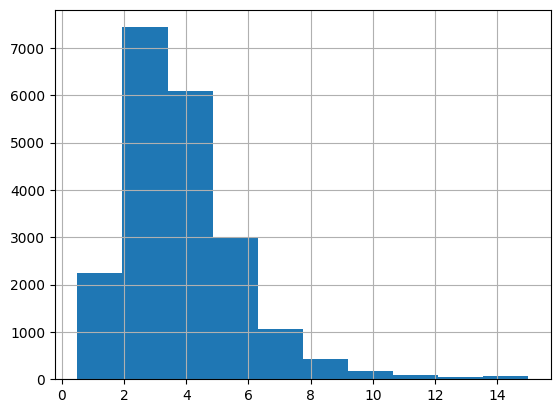

In [41]:
housing["median_income"].hist()

In [ ]:
housing["median_income"].hist(bins=15)

In [42]:
# so this recipe creates a new categorical (class,type, etc) column based on existing numerical column
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5, 3, 4.5, 6, np.inf], # so last values start at 6 and go until positive infinity
                              #  labels=[1, 2, 3, 4, 5] # so labels could be anything
                               labels=["nabagie", "gandrīz vidus", "vidussķira", "gandrīz bagātie", "bagātie"]
                               )
# let's see value counts on what we did
housing["income_cat"].value_counts()

,count
income_cat,
vidussķira,7236
gandrīz vidus,6581
gandrīz bagātie,3639
bagātie,2362
nabagie,822


### Cut inclusion parameter

right : bool, default True
    Indicates whether bins includes the rightmost edge or not. If right == True (the default),

In [43]:
# let's create another category column based on quartiles in median_income
# we will call this column income_quartile
housing["income_quartile"] = pd.qcut(housing["median_income"],
                                      q=5, # so how many equal cuts we want
                                      labels=[1, 2, 3, 4, 5] # and thus we have this many labels for those cuts
                                      )
housing["income_quartile"].value_counts() # so if it equal we need to worry LESS than when we have different value counts

,count
income_quartile,
2,4131
1,4130
4,4128
5,4128
3,4123


In [44]:
# let's rename this column to correct name
housing = housing.rename(columns={"income_quartile": "income_quantile"}) # will do nothing if we already renamed the column
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,income_quantile
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,bagātie,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,bagātie,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,bagātie,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,gandrīz bagātie,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,vidussķira,3


In [45]:
# so if we look for all median_income below and up to including 1.5 value we should be close to 822
len(housing[housing["median_income"] <= 1.5]) # should match the value counts for 1

822

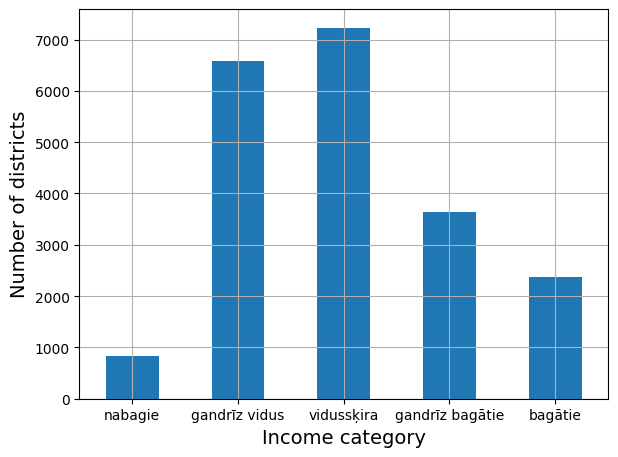

In [46]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [48]:
strat_train_set, strat_test_set = strat_splits[0]

It's much shorter to get a single stratified split:

In [49]:
# let's import train_test_split
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)
# so we pass in stratify parameter the particular category (column) that we want to be correctly represented

In [50]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
vidussķira,0.350533
gandrīz vidus,0.318798
gandrīz bagātie,0.176357
bagātie,0.114341
nabagie,0.039971


In [51]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# so this is unstratified - just random no consideration
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
nabagie,3.98,4.00,4.24,0.36,6.45
gandrīz vidus,31.88,31.88,30.74,-0.02,-3.59
vidussķira,35.06,35.05,34.52,-0.01,-1.53
gandrīz bagātie,17.63,17.64,18.41,0.03,4.42
bagātie,11.44,11.43,12.09,-0.08,5.63


### Dropping unneeded columns from dataframes

In [ ]:
# the following simply drops income_cat from both train and test sets - we are not going to need it after splitting
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True) # note axis=1 refers to columns

# Discover and Visualize the Data to Gain Insights

In [52]:
housing = strat_train_set.copy() # so housing now will have a copy of strat_train_set data
# print shape
print(f"housing shape {housing.shape}")

housing shape (16512, 12)


## Visualizing Geographical Data

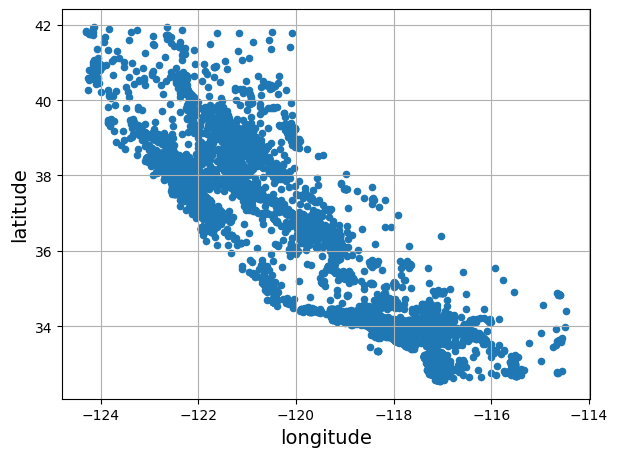

In [53]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

### Improving simple geo plot

Above looks like California but hard to see anything else.

Why? Too much data, so one idea is to set alpha in visualization to better see higher density areas.

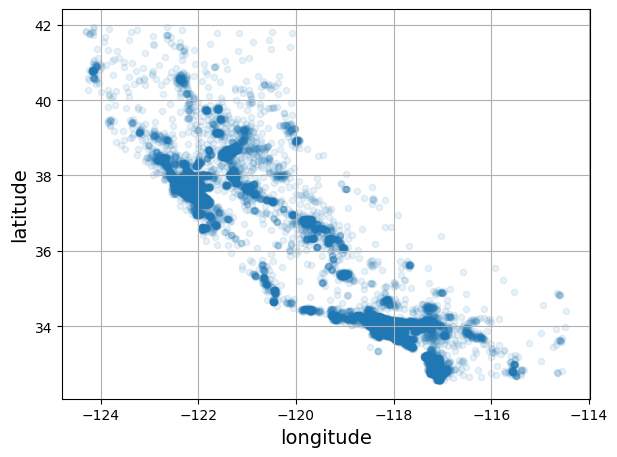

In [55]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.1)
save_fig("better_visualization_plot")  # extra code
plt.show()

### Coloring by median housing price

Next we can add color map based on median_house_value column

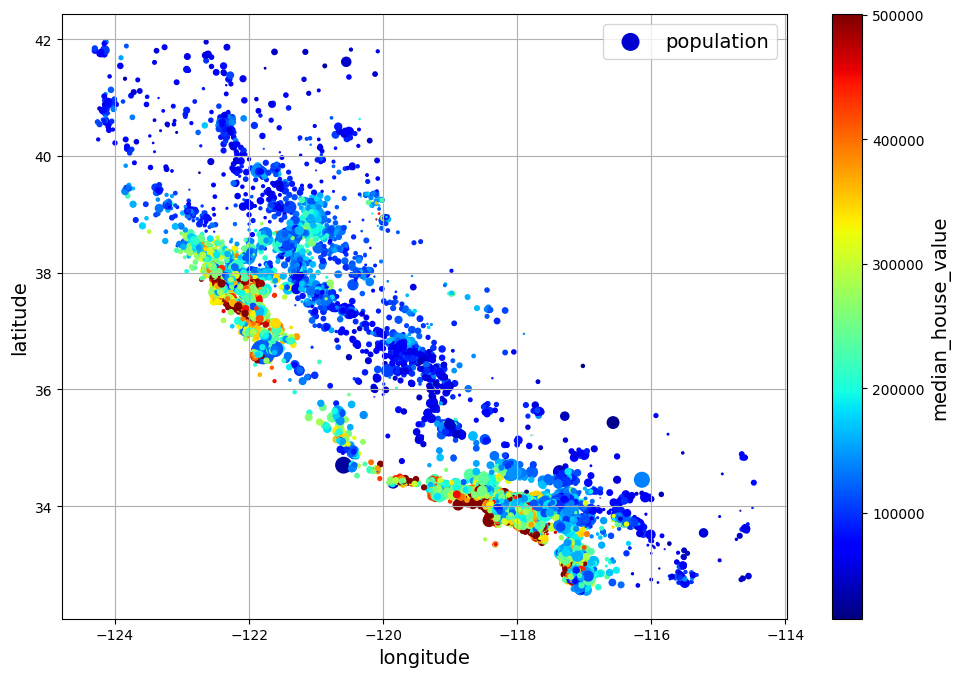

In [56]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             grid=True,
             s=housing["population"] / 100, # s - size, we need to scale
             label="population", # instead of 100 I could play around with some other values say from 80 to 120
             c="median_house_value", # c - color
             cmap="jet",
             colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

The argument `sharex=False` fixes a display bug: without it, the x-axis values and label are not displayed (see: https://github.com/pandas-dev/pandas/issues/10611).

The next cell generates the first figure in the chapter (this code is not in the book). It's just a beautified version of the previous figure, with an image of California added in the background, nicer label names and no grid.

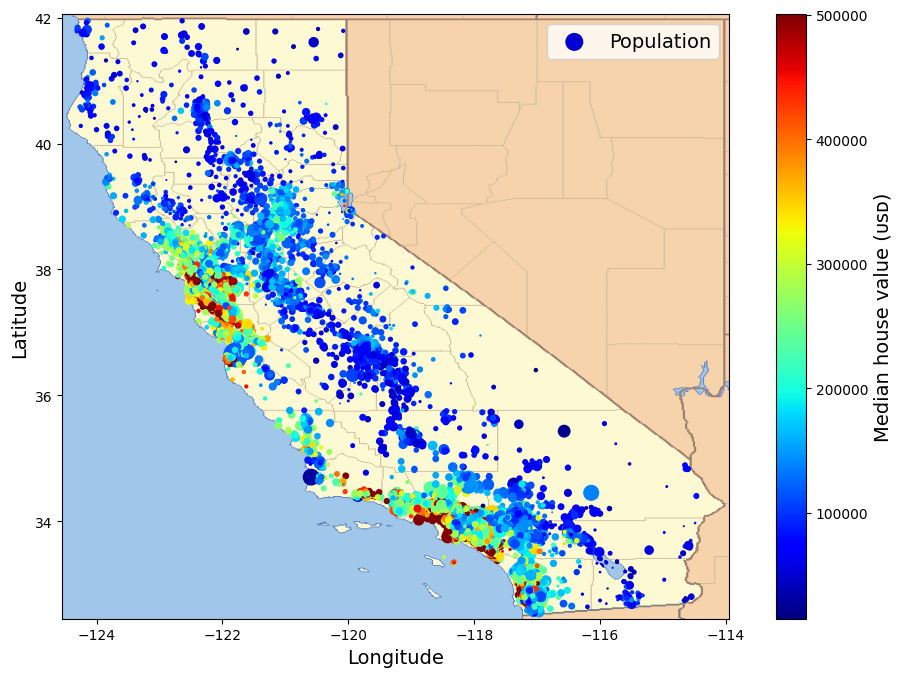

In [57]:
# extra code – this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename) # this read specific image "california.png" as background image for our plot
axis = -124.55, -113.95, 32.45, 42.05 # we would adjust this part to match the image
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

## Resources for more Geo Visualization

Personally I (Valdis) used other visualization libraries for more extensive map plots.

Leaflet.js is pretty easy to use and integrates well with Python.

Also Plotly has good support and there are others.

## Resources for more Geo Visualization

Personally I (Valdis) used other visualization libraries for more extensive map plots.

* [Leaflet.js](https://leafletjs.com/) is pretty easy to use and integrates well with Python (e.g., via the [folium library](https://python-visualization.github.io/folium/)).

* [Plotly](https://plotly.com/python/) also has good support for mapping and there are others.

## Looking for Correlations

Since we do not have a too large a dataset, we can calculate so called
standard correlation coefficient (Pearson's r) for each pair of attributes. using corr.





Note: since Pandas 2.0.0, the `numeric_only` argument defaults to `False`, so we need to set it explicitly to True to avoid an error.

In [58]:
corr_matrix = housing.corr(numeric_only=True) # only for numerics we want the correlations
# shape
print(f"corr_matrix shape {corr_matrix.shape}") # so we have 9 numerics

corr_matrix shape (9, 9)


In [59]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923789,-0.112434,0.043449,0.069183,0.099668,0.054716,-0.015186,-0.046942
latitude,-0.923789,1.000000,0.012639,-0.034902,-0.066612,-0.108471,-0.070945,-0.080334,-0.144735
housing_median_age,-0.112434,0.012639,1.000000,-0.360259,-0.318480,-0.300049,-0.300359,-0.114252,0.109306
total_rooms,0.043449,-0.034902,-0.360259,1.000000,0.928875,0.861048,0.917300,0.196331,0.132360
total_bedrooms,0.069183,-0.066612,-0.318480,0.928875,1.000000,0.881832,0.979234,-0.012353,0.048994
population,0.099668,-0.108471,-0.300049,0.861048,0.881832,1.000000,0.911694,0.001670,-0.027622
households,0.054716,-0.070945,-0.300359,0.917300,0.979234,0.911694,1.000000,0.009054,0.065619
median_income,-0.015186,-0.080334,-0.114252,0.196331,-0.012353,0.001670,0.009054,1.000000,0.684236
median_house_value,-0.046942,-0.144735,0.109306,0.132360,0.048994,-0.027622,0.065619,0.684236,1.000000


In [60]:
# let's look at the whole matrix
# let's color code
corr_matrix.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923789,-0.112434,0.043449,0.069183,0.099668,0.054716,-0.015186,-0.046942
latitude,-0.923789,1.000000,0.012639,-0.034902,-0.066612,-0.108471,-0.070945,-0.080334,-0.144735
housing_median_age,-0.112434,0.012639,1.000000,-0.360259,-0.318480,-0.300049,-0.300359,-0.114252,0.109306
total_rooms,0.043449,-0.034902,-0.360259,1.000000,0.928875,0.861048,0.917300,0.196331,0.132360
total_bedrooms,0.069183,-0.066612,-0.318480,0.928875,1.000000,0.881832,0.979234,-0.012353,0.048994
population,0.099668,-0.108471,-0.300049,0.861048,0.881832,1.000000,0.911694,0.001670,-0.027622
households,0.054716,-0.070945,-0.300359,0.917300,0.979234,0.911694,1.000000,0.009054,0.065619
median_income,-0.015186,-0.080334,-0.114252,0.196331,-0.012353,0.001670,0.009054,1.000000,0.684236
median_house_value,-0.046942,-0.144735,0.109306,0.132360,0.048994,-0.027622,0.065619,0.684236,1.000000


In [ ]:
# type of corr_matrix
type(corr_matrix)

In [62]:
# we are interested in the correlations for the media_house_value because that is what we want to predict!
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.684236
total_rooms,0.132360
housing_median_age,0.109306
households,0.065619
total_bedrooms,0.048994
population,-0.027622
longitude,-0.046942
latitude,-0.144735


### Interpreting Correlations

So max correlation is 1 - means perfect in this case the column itself is perfectly correlated.

And -1 would mean perfect negative correlations.

0 means there is NO correlation.

Again correlation is not causation! However, it is useful for - hey look over there :)

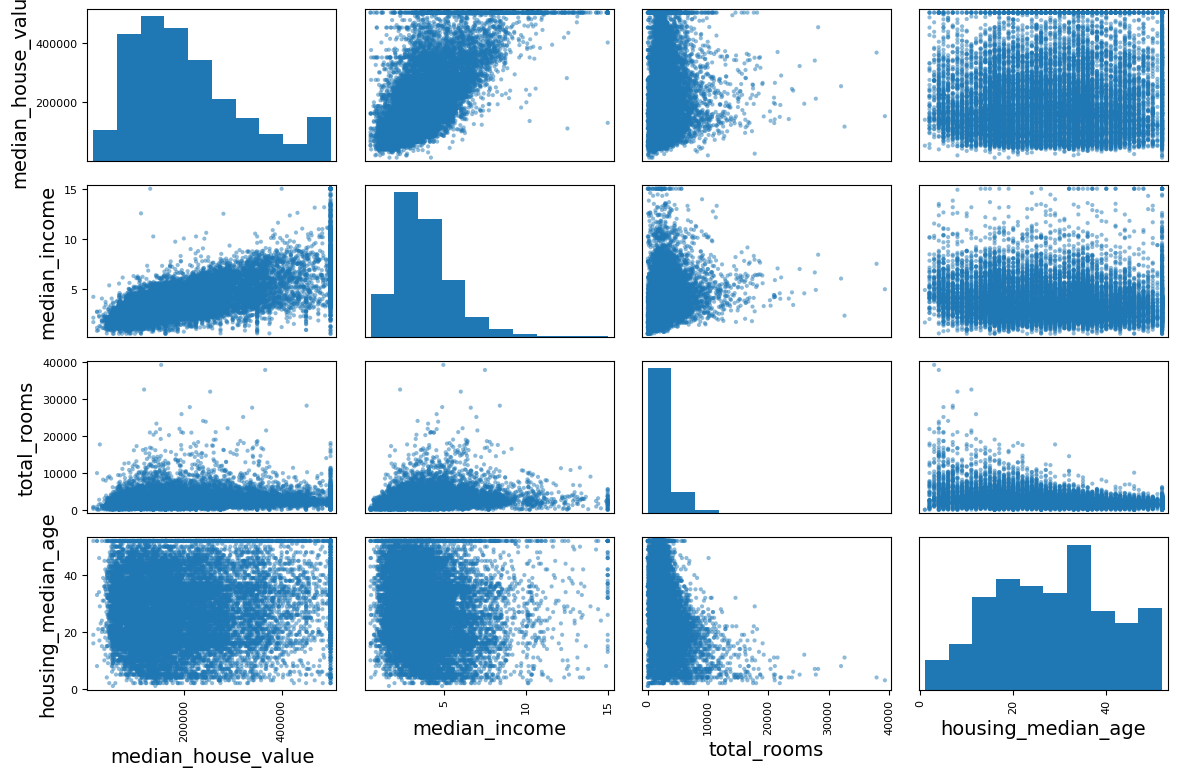

In [61]:
# we do not have room for all numerics so we take 4 for demonstration

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

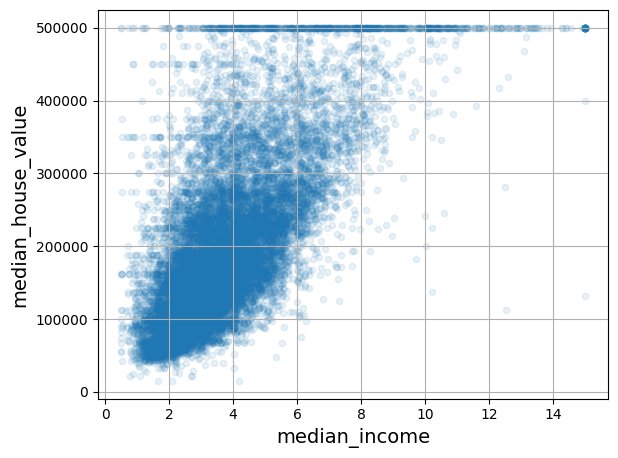

In [63]:
# we can better see distortions caused by having cut off values as catch all
# meaning all houses over 500k are 500k
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

## Experimenting with Attribute Combinations

So again feature engineering means using existing features to create new ones.

In [64]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
# Idea bedrooms ratio as a new attribute - lower would imply more expensive (more other rooms, billiard, dining, library etc etc etc)
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"] # what type of correlation do we expect here?
housing["people_per_house"] = housing["population"] / housing["households"]

In [65]:
# head of housing
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,income_quantile,rooms_per_house,bedrooms_ratio,people_per_house
11856,-118.98,35.38,28.0,1171.0,299.0,1193.0,273.0,0.8639,49400.0,INLAND,nabagie,1,4.289377,0.255337,4.369963
7699,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,311300.0,<1H OCEAN,vidussķira,4,6.272843,0.172163,2.746193
6664,-118.09,34.07,31.0,1054.0,252.0,1032.0,258.0,2.3424,188500.0,<1H OCEAN,gandrīz vidus,1,4.085271,0.239089,4.000000
6283,-122.26,37.54,5.0,1649.0,388.0,779.0,376.0,6.9635,417300.0,NEAR BAY,bagātie,5,4.385638,0.235294,2.071809
12177,-116.96,32.80,24.0,2493.0,693.0,1420.0,643.0,1.8357,104200.0,<1H OCEAN,gandrīz vidus,1,3.877138,0.277978,2.208398


In [66]:
# let us take a quick look at our new and old data stats
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
count,16512.000000,16512.000000,16512.000000,16512.000000,16339.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16339.000000,16512.000000
mean,-119.553989,35.620018,28.619852,2634.871911,538.340841,1425.394198,499.656674,3.871524,206905.575824,5.436417,0.213283,3.073423
std,2.000997,2.135745,12.589109,2162.437944,419.928827,1112.204931,381.846042,1.903738,115234.938880,2.602682,0.058395,10.932995
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.780000,33.930000,18.000000,1448.000000,296.000000,788.000000,280.000000,2.562500,119800.000000,4.440439,0.175443,2.431070
50%,-118.480000,34.250000,29.000000,2127.000000,435.000000,1167.000000,410.000000,3.537500,179800.000000,5.230149,0.203326,2.816355
75%,-118.000000,37.710000,37.000000,3161.000000,650.000000,1729.250000,607.000000,4.740575,264325.000000,6.058461,0.240320,3.280951
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [67]:
housing["rooms_per_house"].max()

141.9090909090909

In [68]:
# let us find the row which has the maximum rooms_per_house
housing[housing["rooms_per_house"] == housing["rooms_per_house"].max()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,income_quantile,rooms_per_house,bedrooms_ratio,people_per_house
7150,-120.1,38.91,33.0,1561.0,282.0,30.0,11.0,1.875,500001.0,INLAND,gandrīz vidus,1,141.909091,0.180653,2.727273


In [ ]:
# Google Maps Link to this high bedrooms area
# https://www.google.com/maps/place/38%C2%B054'36.0%22N+120%C2%B006'00.0%22W/@38.912025,-120.089875,12.75z/
# Looks like this is a national park with some hotels - 11? or maybe less with a few houses

<Axes: >

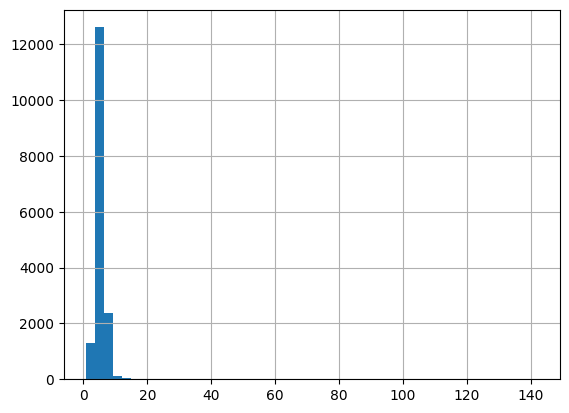

In [69]:
# let us see histogram for rooms_per_house
housing["rooms_per_house"].hist(bins=50)

In [70]:
# let's see districts where rooms_per_house is less than 1
housing[housing["rooms_per_house"] < 1].head()
# TODO use Google Maps Streetview what is going on in this district that rooms are less than houses???
# one of these is an industrial area in long Beach so most likely not really inhabited at night with normal households

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,income_quantile,rooms_per_house,bedrooms_ratio,people_per_house
9812,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,gandrīz bagātie,4,0.888889,0.5625,2.666667
19057,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,gandrīz vidus,2,0.846154,1.0000,1.846154


In [71]:
def create_google_maps_link(longitude, latitude):
    """
    Generates a Google Maps link for a given longitude and latitude.
    """
    return f"https://www.google.com/maps/place/{latitude}%C2%B0N+{longitude}%C2%B0W/@{latitude},{longitude},12.75z/"

# Example usage (uncomment to test):
link = create_google_maps_link(-118.21, 33.79)
print(link)

https://www.google.com/maps/place/33.79%C2%B0N+-118.21%C2%B0W/@33.79,-118.21,12.75z/


In [73]:
corr_matrix = housing.corr(numeric_only=True) # so full matrix again that includes all numerics including our new 3
# shape of our corr_matrix
print(f"corr_matrix shape {corr_matrix.shape}")
corr_matrix["median_house_value"].sort_values(ascending=False)

corr_matrix shape (12, 12)


,median_house_value
median_house_value,1.000000
median_income,0.684236
rooms_per_house,0.141563
total_rooms,0.132360
housing_median_age,0.109306
households,0.065619
total_bedrooms,0.048994
people_per_house,-0.026992
population,-0.027622
longitude,-0.046942


# Prepare the Data for Machine Learning Algorithms

Let's revert to the original training set and separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [74]:
housing = strat_train_set.drop("median_house_value", axis=1) # so our inputs (X) will be everything but answers
# note above creates a copy but does not modifyg the original strat_train_set if you do not use inplace=True parameter
housing_labels = strat_train_set["median_house_value"].copy() # and our answers (lowercase y essentially - what we will try to predict)
# shape
print("housing", housing.shape)
print("housing_labels", housing_labels.shape)

housing (16512, 11)
housing_labels (16512,)


In [75]:
housing_labels[:10] # what we are trying to predict

,median_house_value
11856,49400.0
7699,311300.0
6664,188500.0
6283,417300.0
12177,104200.0
9755,112000.0
3925,500001.0
20118,69600.0
7250,72800.0
1296,387500.0


In [76]:
# let's look at head of housing again it does not have the answers anymore !
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,income_quantile
11856,-118.98,35.38,28.0,1171.0,299.0,1193.0,273.0,0.8639,INLAND,nabagie,1
7699,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,<1H OCEAN,vidussķira,4
6664,-118.09,34.07,31.0,1054.0,252.0,1032.0,258.0,2.3424,<1H OCEAN,gandrīz vidus,1
6283,-122.26,37.54,5.0,1649.0,388.0,779.0,376.0,6.9635,NEAR BAY,bagātie,5
12177,-116.96,32.80,24.0,2493.0,693.0,1420.0,643.0,1.8357,<1H OCEAN,gandrīz vidus,1


## Data Cleaning

In the book 3 options are listed to handle the NaN values:

```python
# we can drop the rows where we have the missing cell for particular column/s
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

# we could just drop the whole feature/attribute
housing.drop("total_bedrooms", axis=1)       # option 2

# or we could impute / the value / median being a better choice over mean to avoid outliers
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [77]:
# so we create a new dataframe where all rows have something missing in some column
# first we get indexes of these rows
null_rows_idx = housing.isnull().any(axis=1)
# then we select them
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,income_quantile
18751,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND,vidussķira,4
15857,-118.18,34.19,48.0,1371.0,NaN,528.0,155.0,15.0001,<1H OCEAN,bagātie,5
8859,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY,vidussķira,3
12419,-119.38,36.53,38.0,1281.0,NaN,1423.0,293.0,1.9602,INLAND,gandrīz vidus,1
9529,-118.31,33.94,40.0,1550.0,NaN,798.0,270.0,3.7750,<1H OCEAN,vidussķira,3


In [78]:
# let's take a look what type of housing blocks have missing bedrooms
missing_bedrooms = housing.loc[null_rows_idx].copy()
missing_bedrooms["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,85
INLAND,47
NEAR OCEAN,22
NEAR BAY,19


### Missing values fix - 1 - drop rows

In [79]:
housing_option1 = housing.copy() # so we create a copy since = for dataframes is simply alias NOT copy
# shape before drop
print("Before dropping rows", housing_option1.shape)
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1
# note inplace means - we modify housing_option1
# default is usualy not in place meaning we would have to assign result to new vairable or overwrite old one
# note I could have passed multiple columns to use for dropping criteria, but I know only total_bedrooms has missing items
print("After dropping rows", housing_option1.shape)
housing_option1.loc[null_rows_idx].head()
# so basically we removed all rows with missing values so we see nothing from the "MISSING" row indexes

Before dropping rows (16512, 11)
After dropping rows (16339, 11)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,income_quantile


### Fixing Missing Values - Option 2 - Drop whole column with missing values

This would be more viable if large percentage of values is missing and we have no other good options.

In [80]:
housing_option2 = housing.copy()
# shape before drop
print("Before dropping rows", housing_option2.shape)
housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2, inplace means that housing_option2 is modified
print("After dropping rows", housing_option2.shape)
housing_option2.loc[null_rows_idx].head()

Before dropping rows (16512, 11)
After dropping rows (16512, 10)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat,income_quantile
18751,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND,vidussķira,4
15857,-118.18,34.19,48.0,1371.0,528.0,155.0,15.0001,<1H OCEAN,bagātie,5
8859,-122.44,37.80,52.0,3830.0,1310.0,963.0,3.4801,NEAR BAY,vidussķira,3
12419,-119.38,36.53,38.0,1281.0,1423.0,293.0,1.9602,INLAND,gandrīz vidus,1
9529,-118.31,33.94,40.0,1550.0,798.0,270.0,3.7750,<1H OCEAN,vidussķira,3


### Fixing Missing Values - Option 3 - Replace values with median for that column

In [81]:
housing_option3 = housing.copy()
print(housing_option3.shape)
# shape will will not change
# instead we will be using mean (well median) imputation again
median = housing["total_bedrooms"].median() # TODO use median for similar population or households
print(f"Will replace missing values with median: {median}")
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3
print(housing_option3.shape)
housing_option3.loc[null_rows_idx].head()

(16512, 11)
Will replace missing values with median: 435.0
(16512, 11)


/tmp/ipython-input-1418479966.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,income_quantile
18751,-121.95,38.03,5.0,5526.0,435.0,3207.0,1012.0,4.0767,INLAND,vidussķira,4
15857,-118.18,34.19,48.0,1371.0,435.0,528.0,155.0,15.0001,<1H OCEAN,bagātie,5
8859,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,NEAR BAY,vidussķira,3
12419,-119.38,36.53,38.0,1281.0,435.0,1423.0,293.0,1.9602,INLAND,gandrīz vidus,1
9529,-118.31,33.94,40.0,1550.0,435.0,798.0,270.0,3.7750,<1H OCEAN,vidussķira,3


### Fixing Missing Values - Option 4 - Use feature engineering from other correlated columns


TODO: We could have used a strongly correlated other column such as total_rooms and created more appropriate values

So we could create a total_bedrooms / total_rooms column then use the median ratio to create total_bedrooms from total_rooms in the missing cells

##  Task - estimating missing bedroom values via correlated column

Impute missing 'total_bedrooms' values in the 'housing' DataFrame by first calculating a 'bedrooms_per_room_ratio' from existing 'total_bedrooms' and 'total_rooms' columns, then using the median of this ratio to fill in the missing 'total_bedrooms' values, and finally verifying the imputation.

## calculate_bedroom_ratio

### Subtask:
Calculate the 'bedrooms_per_room_ratio' for rows where 'total_bedrooms' and 'total_rooms' are available in the 'housing' DataFrame.


**Reasoning**:
The subtask requires calculating the 'bedrooms_per_room_ratio' by dividing 'total_bedrooms' by 'total_rooms' and adding it as a new column to the 'housing' DataFrame. This operation directly addresses the instruction.



In [ ]:
housing['bedrooms_per_room_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,income_quantile,bedrooms_per_room_ratio
11856,-118.98,35.38,28.0,1171.0,299.0,1193.0,273.0,0.8639,INLAND,nabagie,1,0.255337
7699,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,<1H OCEAN,vidussķira,4,0.172163
6664,-118.09,34.07,31.0,1054.0,252.0,1032.0,258.0,2.3424,<1H OCEAN,gandrīz vidus,1,0.239089
6283,-122.26,37.54,5.0,1649.0,388.0,779.0,376.0,6.9635,NEAR BAY,bagātie,5,0.235294
12177,-116.96,32.80,24.0,2493.0,693.0,1420.0,643.0,1.8357,<1H OCEAN,gandrīz vidus,1,0.277978


## calculate_median_bedroom_ratio

### Subtask:
Calculate the median of the newly created 'bedrooms_per_room_ratio'.


**Reasoning**:
Calculate the median of the 'bedrooms_per_room_ratio' column, which was created in the previous step, and store it in a new variable.



In [ ]:
median_bedrooms_per_room_ratio = housing['bedrooms_per_room_ratio'].median()
print(f"Median bedrooms per room ratio: {median_bedrooms_per_room_ratio}")

Median bedrooms per room ratio: 0.20332577475434618


**Reasoning**:
Impute the missing 'total_bedrooms' values by calculating them using the 'total_rooms' and the previously computed 'median_bedrooms_per_room_ratio'.



In [ ]:
housing4 = housing.copy()
missing_bedrooms_idx = housing4['total_bedrooms'].isnull()
housing4.loc[missing_bedrooms_idx, 'total_bedrooms'] = (
    housing4.loc[missing_bedrooms_idx, 'total_rooms'] * median_bedrooms_per_room_ratio
)
print("Number of missing 'total_bedrooms' after imputation:", housing4['total_bedrooms'].isnull().sum())

Number of missing 'total_bedrooms' after imputation: 0


## verify_imputation

### Subtask:
Verify that the missing 'total_bedrooms' values have been successfully imputed and show the updated DataFrame head for the affected rows.


## Summary:

### Q&A
The missing 'total\_bedrooms' values have been successfully imputed, with the number of missing values reduced to 0 after the process. The updated DataFrame head for the affected rows was not explicitly shown in the final output, but the success of the imputation was confirmed.

### Data Analysis Key Findings
*   A new column, `bedrooms_per_room_ratio`, was successfully added to the `housing` DataFrame by dividing `total_bedrooms` by `total_rooms`.
*   The median of the `bedrooms_per_room_ratio` was calculated to be approximately 0.2033.
*   Missing `total_bedrooms` values were imputed by multiplying the `total_rooms` for rows with missing bedrooms by the calculated median `bedrooms_per_room_ratio`.
*   After imputation, the count of missing values in the `total_bedrooms` column was verified to be 0, indicating a complete and successful imputation.

### Insights or Next Steps
*   The imputation strategy using a ratio based on related features (`total_rooms`) is a robust method for handling missing data, preserving the inherent relationships within the dataset.
*   The dataset is now prepared for further analysis or modeling, as all missing values in the `total_bedrooms` column have been addressed.


In [ ]:
# for imputation we can use built in methods from scikit learn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") # we could use other strategies as well

Separating out the numerical attributes to use the `"median"` strategy (as it cannot be calculated on text attributes like `ocean_proximity`):

In [ ]:
housing_num = housing.select_dtypes(include=[np.number])
print(f"housing_num shape: {housing_num.shape}")

In [ ]:
imputer.fit(housing_num) # this will calculate our medians or whatever else strategy

In [ ]:
imputer.statistics_ # so these should be medians for each column

Check that this is the same as manually computing the median of each attribute:

In [ ]:
housing_num.median().values

Transform the training set:

In [ ]:
X = imputer.transform(housing_num) # so here our X has our training data with missing values imputed as median values from that column

In [ ]:
imputer.feature_names_in_

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
housing_tr.loc[null_rows_idx].head() # we can see that all null_row indexes have full values

In [ ]:
imputer.strategy

In [ ]:
# so we create new dataframe from our imputed data
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [ ]:
housing_tr.loc[null_rows_idx].head()  # not shown in the book

In [ ]:
#from sklearn import set_config
#
# set_config(transform_output="pandas")  # scikit-learn >= 1.2

## Outlier detection with Isolation Forest

Now let's drop some outliers:

In [ ]:
from sklearn.ensemble import IsolationForest
# TODO read more about IsolationForest approach to outlier detection in scikit-learn documentation

isolation_forest = IsolationForest(random_state=42) # could use other numbers for setup instead of 42 - no real meaning behind 42
outlier_pred = isolation_forest.fit_predict(X)

In [ ]:
outlier_pred

If you wanted to drop outliers, you would run the following code:

In [ ]:
#housing = housing.iloc[outlier_pred == 1] # so 1 means inlier
#housing_labels = housing_labels.iloc[outlier_pred == 1]

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [ ]:
housing_cat = housing[["ocean_proximity"]] # so housing cat is a single column
housing_cat.head(8)

In [ ]:
# show the unique categories
housing_cat["ocean_proximity"].unique()

In [ ]:
# so first approach will create ordinals (numbers) from categories
# this approach would be useful if the numbers have relational mapping to categories - that is there is sense of something being 1 and some other category being 2
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) # note here fit_transform does the fitting (finds values for transformation) and transform itself (assigns these values)

In [ ]:
housing_cat_encoded[:8]

In [ ]:
ordinal_encoder.categories_
# see how the numerical values really have no relation to our categories
# so not very good for model building, because we have not clear numerical relation between these categories

## Transforming categorical via One-Hot encoding

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Often we do not not want just numbers out of categories if the categories do not match to numers by some rule

Instead we use one hot - to preserve independence of each category

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder() # create a fresh encoder with no knowledge of any data
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) # we find suitable values and encode them

In [ ]:
housing_cat_1hot

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [ ]:
housing_cat_1hot.toarray() # so sparse array has toarray() method

Alternatively, you can set `sparse_output=False` when creating the `OneHotEncoder` (note: the `sparse` hyperparameter was renamned to `sparse_output` in Scikit-Learn 1.2):

In [ ]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
cat_encoder.categories_

In [ ]:
# let's add these columns to our housing dataframe
# we will use housing[["ocean_proximity"]] and transform into One-Hot encoding
df_output = pd.DataFrame(cat_encoder.transform(housing[["ocean_proximity"]]),
                         columns=cat_encoder.get_feature_names_out(),
                         index=housing.index)
df_output.head()



In [ ]:
# let's add the one_hot to our housing dataframe
housing = pd.concat([housing, df_output], axis=1) # note axis=1 meaning we concatenate side by side
housing.head()

In [ ]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

In [ ]:
cat_encoder.transform(df_test)

In [ ]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

In [ ]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

In [ ]:
cat_encoder.feature_names_in_

In [ ]:
cat_encoder.get_feature_names_out()

In [ ]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [ ]:
df_output

## Feature Scaling

So we want to scale our features, because we want our model to consider all attributes with equal weight.

In [ ]:
# let's get again only numerics from our housing dataframe
housing_num = housing.select_dtypes(include=[np.number])
# shape
print(f"housing_num shape: {housing_num.shape}")

In [ ]:
housing_num.describe()

In [ ]:
# so simplest scaler would be MinMaxScaler

# usually we use -1 to 1 to scale our data

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1)) # so if I wanted to scale from 0 to 1 I would use feature_range=(0,1)
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
# let's add column names from housing_num to housing_num_min_max_scaled
housing_num_min_max_scaled = pd.DataFrame(housing_num_min_max_scaled, columns=housing_num.columns)
pd.DataFrame(housing_num_min_max_scaled).describe()
# note above

In [ ]:
# So standard scaler gives you mean of 0
# also standard deviation then is 1
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
# let's add column names from housing_num to housing_num_min_max_scaled
housing_num_std_scaled = pd.DataFrame(housing_num_std_scaled, columns=housing_num.columns)
pd.DataFrame(housing_num_std_scaled).describe()

In [ ]:
# let's plot histogram of first column
housing_num["longitude"].hist(bins=50)

In [ ]:
housing_num_std_scaled["longitude"].hist(bins=50)

In [ ]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

What if we replace each value with its percentile?

In [ ]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [ ]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

## Select and Train Model

So in Linear Regression we find a linear equation y = ax + b that minimizes the error to our existing training data.

In [ ]:
from sklearn.linear_model import LinearRegression # this recipe will be similar to other regressor

target_scaler = StandardScaler() # we want our features scaled by standard
# next line transform our features/attribute into their scaled versions using standard scaler
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())


model = LinearRegression() # we have a model ready to learn
# by fitting the model learns , this is where the work happens
# we will pass a single attribute and the answers/labels to learn from
model.fit(housing[["median_income"]], scaled_labels) # so here we already have a regressor model
# now we have a model that is ready to predict
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data - this is from our training so it should be decent prediction but of course not general!

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [ ]:
# let us see housing labels first 5 before transformation
housing_labels[:5]

In [ ]:
# let us see first 5 scaled labels
scaled_labels[:5]

In [ ]:
predictions

In [ ]:
# let's extract the linear formula from the model
model.intercept_, model.coef_ #not that we could theoretically have many coefficients if we had many attributes x1, x2, x3, etc

In [ ]:
# let's calculate root mean square error for our predictions
from sklearn.metrics import mean_squared_error, root_mean_squared_error

mse = mean_squared_error(housing_labels[:5], predictions)
rmse = np.sqrt(mse) # so this is what we use to evaluate our quantitive model Root Mean Square Error
also_rmse = root_mean_squared_error(housing_labels[:5], predictions)
# let's see both
mse, rmse, also_rmse

In [ ]:
housing_labels[:5]

In [ ]:
# let's add housing_labels[:5] and predictions in a same mini DataFrame
mini_df = pd.DataFrame({"labels": housing_labels[:5], "predictions": predictions.flatten()})
mini_df.head()

In [ ]:
# let's add a column for absolute difference - residuals (errors)
mini_df["diff"] = mini_df["labels"] - mini_df["predictions"]
mini_df.head()


In [ ]:
# let's calculate rmse out of diff column by hand
mse = (mini_df["diff"] ** 2).mean()
rmse = np.sqrt(mse)
mse, rmse

In [ ]:
# since we often have to do Scaling before Regression
# scikit learn offers one stop module for doing BOTH
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels) # this is where we pass attributes and of course or label
predictions = model.predict(some_new_data)

In [ ]:
predictions

## Training on more than one attribute

To train using more than one attribute we simply pass them during fit process

In [ ]:
# let us see our attribute in housing
housing.head()

In [ ]:
# so let's use total_rooms, population, housing_median_age and median_income all standard scaled
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["total_rooms", "median_income","population", "housing_median_age"]], housing_labels) # this is where we pass

In [ ]:
from sklearn.metrics import mean_squared_error
# let's see how it performs on our our training set
predictions = model.predict(housing[["total_rooms", "median_income","population", "housing_median_age"]])
# calculate mse, rmse
mse = mean_squared_error(housing_labels, predictions)
# here housing_labels is the "ground truth"
rmse = np.sqrt(mse)
mse, rmse

In [ ]:
# let us make prediction on our test set
# strat_test_set
test_labels = strat_test_set["median_house_value"].copy()
strat_test_set.drop("median_house_value", axis=1, inplace=True)
predictions = model.predict(strat_test_set[["total_rooms", "median_income","population", "housing_median_age"]])
# calculate mse, rmse
mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)
mse, rmse
# so interestingly our test data give us similar results
# why?
# well our test set is very similar to our train set
# so good news our model is not overfit
# and also the model is very general
# bad news - it still has "horrible" eval - here rmse - 80,000 so off by quite a bit

## Custom Transformers

To create simple transformers:

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [ ]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [ ]:
age_simil_35

In [ ]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [ ]:
sf_simil

In [ ]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [ ]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

**Warning**:
* There was a change in Scikit-Learn 1.3.0 which affected the random number generator for `KMeans` initialization. Therefore the results will be different than in the book if you use Scikit-Learn ≥ 1.3. That's not a problem as long as you don't expect the outputs to be perfectly identical.
* Throughout this notebook, when `n_init` was not set when creating a `KMeans` estimator, I explicitly set it to `n_init=10` to avoid a warning about the fact that the default value for this hyperparameter will change from 10 to `"auto"` in Scikit-Learn 1.4.

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [ ]:
similarities[:3].round(2)

In [ ]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

## Transformation Pipelines

Now let's build a pipeline to preprocess the numerical attributes:

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])
num_pipeline

In [ ]:
# alternative way to make pipeline is to use make_pipeline function
from sklearn.pipeline import make_pipeline

# i will overwrite over the previous pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

In [ ]:
from sklearn import set_config

# we would use this to show diagrams of pipelines - I think it is already set in Google Colab to show diagrams
set_config(display='diagram')

num_pipeline

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
# so above line will impute missing values using Simple Imputer
# then scale the data in all columns using Standard Scaler
housing_num_prepared[:2].round(2)

In [ ]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [ ]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [ ]:
df_housing_num_prepared.head(2)  # extra code

In [ ]:
num_pipeline.steps

In [ ]:
num_pipeline[1]

In [ ]:
num_pipeline[:-1]

In [ ]:
num_pipeline.named_steps["simpleimputer"]

In [ ]:
num_pipeline.set_params(simpleimputer__strategy="median")

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
# extra code – shows that we can get a DataFrame out if we want
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

In [ ]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

In [ ]:
preprocessing.get_feature_names_out()

# Select and Train a Model

## Training and Evaluating on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression


# lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg = make_pipeline(num_pipeline, LinearRegression())
# get numeric only
housing_numerics = housing.select_dtypes(include=[np.number])
# housing_num = housing_numerics.drop("median_house_value", axis=1)
lin_reg.fit(housing_numerics, housing_labels)

Let's try the full preprocessing pipeline on a few training instances:

In [ ]:
housing_predictions = lin_reg.predict(housing_numerics)
# we show first 5 predictions
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

Compare against the actual values:

In [ ]:
housing_labels.iloc[:5].values

In [ ]:
# extra code – computes the error ratios discussed in the book
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

**Warning**: In recent versions of Scikit-Learn, you must use `root_mean_squared_error(labels, predictions)` to compute the RMSE, instead of `mean_squared_error(labels, predictions, squared=False)`. The following `try`/`except` block tries to import `root_mean_squared_error`, and if it fails it just defines it.

In [ ]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

In [ ]:
# We can now use any other regressor with this pipeline
from sklearn.tree import DecisionTreeRegressor
# for now let's use num_pipeline only
preprocessing = num_pipeline # alias
# similarly we will alias housing_numerics to housing
housing = housing_numerics

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse # so tree predictor is perfect on its own training data, small surpsie but not very useful :) it means it overfit most likely

## Better Evaluation Using Cross-Validation

In [ ]:
# shape of housing
print(f"Shape of housing {housing.shape}")

In [ ]:
# shape of labels
print(f"Shape of labels {housing_labels.shape}")

In [ ]:
# let's make a simple Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(tree_rmses).describe()

In [ ]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

**Warning:** the following cell may take a few minutes to run:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(forest_rmses).describe()

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [ ]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

## So main steps in preparing Regressors

* Prepare data from missing ones (drop or impute NaNs)
* Possibly create some extre feature columns using existing columns
* Split into train / test (possibly using Stratified split if some category needs correct representation)
* Scale all features either MinMax (-1 to 1) or StandarScaler (mean 0, variance 1)
* Select Model (LinearRegressor and others), create regressor Instance
* Fit Model to Training Data
* Calcule RMSE from Test Data
* Could try Stratified K-Fold as well here

## 🏡 Class Exercise: Working with the California Housing Dataset (30–45 minutes)

In this exercise, you will practice preparing and analyzing the California Housing dataset before moving on to advanced pipelines and evaluation. Work step by step and explore the dataset carefully.

### Tasks

- **Load & Inspect Data**
  - Load the California Housing dataset into a Pandas DataFrame.
  - Display the first few rows and examine the column names.
  - Identify which column is the target variable.

- **Explore Features**
  - Compute basic statistics (`.describe()`) for all numerical columns.
  - Plot histograms for at least **two features** and discuss what you notice.
  - Check correlations between `median_house_value` and at least two other features.

- **Data Cleaning**
  - Identify if there are any missing values in the dataset.
  - Suggest a strategy to handle them (e.g., drop, fill with mean/median, etc.).
  - Apply your chosen strategy.

- **Train/Test Split**
  - Perform a train/test split of the dataset (e.g., 80/20 or 70/30).
  - Verify the shape of the resulting sets.

- **First Model Attempt**
  - Train a **Linear Regression** model using Scikit-Learn on your training set.
  - Predict on the test set and compute **RMSE**.
  - Briefly reflect: does the RMSE seem large or small relative to target values?

### Deliverables

- Your code cells and outputs in the notebook.
- Short written notes or comments in Markdown cells summarizing:
  - What patterns you observed in the features.
  - What cleaning choices you made and why.
  - How well the first model performed.

💡 **Tip:** Focus on exploration and careful observation — performance will improve later once we learn about pipelines and feature engineering.


Note: We already did most of this in the class, it is up to you to put it together in a single or few related cells.

Note2: It is okay to try Linear Regression on untransformed data (without scaling) see how bad (or good) it works.

In [ ]:
# let's try loading sample data for California Housing that comes from Google Colab
# docs for sklearn.datasets:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True).frame
housing.head()

In [ ]:
# shape of housing
print(f"Shape of housing {housing.shape}")

In [ ]:
# describe
housing.describe()
# so we can see that MedHouseVal is actually here 100k because we see max is 5.000010 so 500,100 USD
# TODO check if MedInc is is 10k

In [ ]:
# let's see the total population again
housing["Population"].sum()

In [ ]:
# TODO visualize histograms
# let's see histograms for all numeric columns
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
# let's split 75 25 in housing_train and housing_test
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.25, random_state=42)
# shapes
print(train_set.shape, test_set.shape)

In [ ]:
# let us split y - MedHouseVal from X which is all other columns
y_train = train_set["MedHouseVal"].copy() # these are answers
X_train = train_set.drop("MedHouseVal", axis=1) # we keep everything else as inputs
# shapes
print(X_train.shape, y_train.shape)

In [ ]:
# double check that we have all values for X_train
X_train.info() # this is one way
# count how many nan values we have
# let's count null values for each column first
# TODO check why this recipe is ambiguous
# X_train.isnull().sum()
# assert X_train.isnull().sum() == 0, "We have missing values in X_train"
# print("No missing Values!")

In [ ]:
# let's split test_set as well
y_test = test_set["MedHouseVal"].copy() # these are answers
X_test = test_set.drop("MedHouseVal", axis=1)
# shapes
print(X_test.shape, y_test.shape)

In [ ]:
# Let's use LinearRegressor and StandardScaler together to build our model
from sklearn.pipeline import make_pipeline # for creating chains (pipelines,conveyer) of actions to perform
# let's add imputator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(SimpleImputer(strategy="median"),StandardScaler(), LinearRegression())
lin_reg.fit(X_train, y_train) # this trains the model with ALL the features

In [ ]:
# let's show first 5 rows of X_train
X_train.head()

In [ ]:
# let us check mse and rmse for our model on test_set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import numpy as np

y_test = test_set["MedHouseVal"].copy()
X_test = test_set.drop("MedHouseVal", axis=1)
housing_predictions = lin_reg.predict(X_test)
# now we can calculate (by comparing) our ground truth values with predictions
lin_mse = mean_squared_error(y_test, housing_predictions)
# lin_rmse = np.sqrt(lin_mse)
lin_rmse = root_mean_squared_error(y_test, housing_predictions)
print(f"RMSE on test data: {lin_rmse}")

In [ ]:
# so in our case this RMSE is in 100k of USD so let's calculate actual value of this Root Mean Square Error
rmse_usd = lin_rmse * 100_000 # we can use _ for bigger numbers, pure cosmetics
print(f"RMSE in USD: {rmse_usd}")

## Improving our MOdel

We have different approaches we could use

* get more data - not today :) - we have full California from 1990
* pick different model - we will try different ones
* pick different features maybe a subset
* try fine-tuning a model

In [ ]:
# let's make a separate pre_processing pipeline, so we can use it for ALL actual regressors
pre_processing = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
# we could have added some more steps such as custom transformers for specific data
# show it
pre_processing

In [ ]:
# Let's try the same training with Elastic Net
from sklearn.linear_model import ElasticNet

# elastic_net = make_pipeline(StandardScaler(), ElasticNet(random_state=42)) # 42 is just a randome starting point
elastic_net = make_pipeline(pre_processing, ElasticNet(random_state=42)) # 42 is just a randome starting point
elastic_net.fit(X_train, y_train) # again we have model trained here

In [ ]:
# now let us evaluate on test again
# we already split our answers  into y_test and features into X_test
housing_predictions = elastic_net.predict(X_test)
# lin_mse = mean_squared_error(y_test, housing_predictions)
# lin_rmse = np.sqrt(lin_mse)
lin_rmse = root_mean_squared_error(y_test, housing_predictions)
print(f"RMSE on test data: {lin_rmse}")

In [ ]:
# how did Elastic Net actually work on training data - did it overfit?
# let's calculate lin_rmse for training data
housing_predictions = elastic_net.predict(X_train)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE on training data: {lin_rmse}") # so Elastic Net is just not suitable here

In [ ]:
# let's try now with Gradient Tree Boosting
from sklearn.ensemble import GradientBoostingRegressor

gbrt = make_pipeline(pre_processing, GradientBoostingRegressor(random_state=42))
gbrt.fit(X_train, y_train) # again we have a new model trained

In [ ]:
# let us evaluate on test again
housing_predictions = gbrt.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE on test data: {lin_rmse}")

In [ ]:
# let's calculate percentage error on each prediction in X_test
error_ratios = housing_predictions / y_test - 1
error_ratios.head()

In [ ]:
# average percentage error but this is not useful since we have errors in both directions and so some will cancel out
error_ratios.mean()

In [ ]:
# TODO try dropping some columns that might not be helping
# TODO try creating new columns such as bedroom ratio

## Saving - persisting models

In [ ]:
# let us save gbrt model for future use
# we will use joblib
import joblib

joblib.dump(gbrt, "california_housing_model_gbrt_rstate_53.pkl") # pkl stands for pickle standard way of serializing Python objects (any data)

In [ ]:
# let us save it from Colab to local computer
from google.colab import files

files.download("california_housing_model_gbrt_rstate_53.pkl")

## Loading Models

In [ ]:
# let us load this model
model = joblib.load("california_housing_model_gbrt_rstate_53.pkl")
# so here model should be good to go
# let evaluate it on test again
housing_predictions = model.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE on test data: {lin_rmse}")

In [ ]:
# TODO challenge beat current RMSE
# To Try
# Try different features meaning we either use less (not full) - or find new ones
# Try different models
# Try different hyperparameters for models

# Finally get better data! :)

In [ ]:
# let us try Support Vector Regression model
from sklearn.svm import SVR

svr = make_pipeline(StandardScaler(), SVR())
svr.fit(X_train, y_train) # again we have a new model trained

In [ ]:
# let's calculate RMSE again
housing_predictions = svr.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE on test data: {lin_rmse}")

In [ ]:
# so next step would be start moving columns around maybe not use all columns

In [ ]:
# let's load california_housing_train.csv from sample_data folder
# this will only work on Colab or if you already have this sample_data
import pandas as pd

training = pd.read_csv("sample_data/california_housing_train.csv")
training.head()

In [ ]:
training.describe()

In [ ]:
# let's get pair of coordinates for first row in training
long, lat = training.iloc[0][["longitude", "latitude"]]
print(long, lat)

In [ ]:
# find if these exact coordinates are in housing dataframe
# Latitude	Longitude
housing.loc[(housing["Longitude"] == long) & (housing["Latitude"] == lat)]

In [ ]:
training.head(1)

In [ ]:
# let's add 3 new columns to training
# AveRooms is total_rooms / households
# AveBedrooms is total_bedrooms / households
# AveOccupation population / households
training["AveRooms"] = training["total_rooms"] / training["households"]
training["AveBedrooms"] = training["total_bedrooms"] / training["households"]
training["AveOccupation"] = training["population"] / training["households"]
training.head(2)

In [ ]:
# so let's try to predict median_house_value based on just median_incume using LinearRegressor
y = training["median_house_value"].copy()
X = training[["median_income"]] # note the double square brackets to preserve 2D shape
# let's check those shapes
print(X.shape, y.shape) # so X is 2D matrix but y is 1d Vectors

In [ ]:
# so let's use simple Linear Regression
from sklearn.linear_model import LinearRegression
# so no need to Scaling since I am using only a single incoming parameter - median_income

lin_reg = LinearRegression()
lin_reg.fit(X, y) # the model trains here and is ready

In [ ]:
# i can print intercept and coeff
print(lin_reg.intercept_, lin_reg.coef_) # note coefficient is given as vector, because we could have had many parameters

In [ ]:
# let's score on training data
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE on training data: {lin_rmse}")

In [ ]:
# let's load test data california_housing_test.csv
testing = pd.read_csv("sample_data/california_housing_test.csv")
testing.head()

In [ ]:
# shape
testing.shape

In [ ]:
# let's print population sum in training and test and also the total population
print(training["population"].sum())
print(testing["population"].sum())
print(training["population"].sum() + testing["population"].sum())
# here we see that those missing 640 districts/regions actually did have population of about 800,000

In [ ]:
# let's score the testing data
X_test = testing[["median_income"]]
y_test = testing["median_house_value"].copy() # ground truth
housing_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions) # order should not matter right since we lose the - from any residuals (differences)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE on testing data: {lin_rmse}")

### RMSE on Linear Regressor

So we did not see meaningful difference in RMSE between train and test, because of the way our data is spread and Linear Regressor simply draws a line

In [ ]:
# let's try DecisionTreeRegressor on our training data
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X, y) # model is ready here
# score on training for now
housing_predictions = tree_reg.predict(X)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE on training data: {lin_rmse}") # this should be quite good (but not useful!)

In [ ]:
# now let's score on test data
housing_predictions = tree_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE on testing data: {lin_rmse}")
# so we see why DecisionTreeRegression is not so good here
# the model has OVERFIT on training
# and generalizes badly on other unseen data

In [ ]:
# let's plot train_df and the predictions
import matplotlib.pyplot as plt

plt.scatter(train_df["X"], train_df["y"])
plt.plot(train_df["X"], lin_reg.predict(train_df[["X"]]), color="red")
plt.show()

In [ ]:
# Try different regressors and of course use train and test splits to check your RMSE
# https://scikit-learn.org/stable/machine_learning_map.html

# Fine-Tune Your Model

## Grid Search

**Warning:** the following cell may take a few minutes to run:

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

You can get the full list of hyperparameters available for tuning by looking at `full_pipeline.get_params().keys()`:

In [ ]:
# extra code – shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

## Randomized Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

Try 30 (`n_iter` × `cv`) random combinations of hyperparameters:

**Warning:** the following cell may take a few minutes to run:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

In [ ]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

**Bonus section: how to choose the sampling distribution for a hyperparameter**

* `scipy.stats.randint(a, b+1)`: for hyperparameters with _discrete_ values that range from a to b, and all values in that range seem equally likely.
* `scipy.stats.uniform(a, b)`: this is very similar, but for _continuous_ hyperparameters.
* `scipy.stats.geom(1 / scale)`: for discrete values, when you want to sample roughly in a given scale. E.g., with scale=1000 most samples will be in this ballpark, but ~10% of all samples will be <100 and ~10% will be >2300.
* `scipy.stats.expon(scale)`: this is the continuous equivalent of `geom`. Just set `scale` to the most likely value.
* `scipy.stats.loguniform(a, b)`: when you have almost no idea what the optimal hyperparameter value's scale is. If you set a=0.01 and b=100, then you're just as likely to sample a value between 0.01 and 0.1 as a value between 10 and 100.


Here are plots of the probability mass functions (for discrete variables), and probability density functions (for continuous variables) for `randint()`, `uniform()`, `geom()` and `expon()`:

In [ ]:
# extra code – plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

Here are the PDF for `expon()` and `loguniform()` (left column), as well as the PDF of log(X) (right column). The right column shows the distribution of hyperparameter _scales_. You can see that `expon()` favors hyperparameters with roughly the desired scale, with a longer tail towards the smaller scales. But `loguniform()` does not favor any scale, they are all equally likely:

In [ ]:
# extra code – shows the difference between expon and loguniform

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

## Analyze the Best Models and Their Errors

In [ ]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

In [ ]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

## Evaluate Your System on the Test Set

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval


In [ ]:
rmse_lower, rmse_upper

## Model persistence using joblib

Save the final model:

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

You could use pickle instead, but joblib is more efficient.

# Exercise solutions

## 1.

Exercise: _Try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the SVM notebook if you're interested). How does the best `SVR` predictor perform?_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'svr__kernel': ['linear'], 'svr__C': [10., 30., 100., 300., 1000.,
                                               3000., 10000., 30000.0]},
        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0],
         'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

The best model achieves the following score (evaluated using 3-fold cross validation):

In [ ]:
svr_grid_search_rmse = -grid_search.best_score_
svr_grid_search_rmse

That's much worse than the `RandomForestRegressor` (but to be fair, we trained the model on much less data). Let's check the best hyperparameters found:

In [ ]:
grid_search.best_params_

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Exercise: _Try replacing the `GridSearchCV` with a `RandomizedSearchCV`._

**Warning:** the following cell will take several minutes to run. You can specify `verbose=2` when creating the `RandomizedSearchCV` if you want to see the training details.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, loguniform

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `loguniform()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(20, 200_000),
        'svr__gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svr_pipeline,
                                param_distributions=param_distribs,
                                n_iter=50, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

The best model achieves the following score (evaluated using 3-fold cross validation):

In [ ]:
svr_rnd_search_rmse = -rnd_search.best_score_
svr_rnd_search_rmse

Now that's really much better, but still far from the `RandomForestRegressor`'s performance. Let's check the best hyperparameters found:

In [ ]:
rnd_search.best_params_

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Note that we used the `expon()` distribution for `gamma`, with a scale of 1, so `RandomSearch` mostly searched for values roughly of that scale: about 80% of the samples were between 0.1 and 2.3 (roughly 10% were smaller and 10% were larger):

In [ ]:
np.random.seed(42)

s = expon(scale=1).rvs(100_000)  # get 100,000 samples
((s > 0.105) & (s < 2.29)).sum() / 100_000

We used the `loguniform()` distribution for `C`, meaning we did not have a clue what the optimal scale of `C` was before running the random search. It explored the range from 20 to 200 just as much as the range from 2,000 to 20,000 or from 20,000 to 200,000.

## 3.

Exercise: _Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes._

Let's create a new pipeline that runs the previously defined preparation pipeline, and adds a `SelectFromModel` transformer based on a `RandomForestRegressor` before the final regressor:

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('selector', SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)),  # min feature importance
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
selector_rmses = -cross_val_score(selector_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(selector_rmses).describe()

Oh well, feature selection does not seem to help. But maybe that's just because the threshold we used was not optimal. Perhaps try tuning it using random search or grid search?

## 4.

Exercise: _Try creating a custom transformer that trains a k-Nearest Neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model's predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using latitude and longitude as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts._

Rather than restrict ourselves to k-Nearest Neighbors regressors, let's create a transformer that accepts any regressor. For this, we can extend the `MetaEstimatorMixin` and have a required `estimator` argument in the constructor. The `fit()` method must work on a clone of this estimator, and it must also save `feature_names_in_`. The `MetaEstimatorMixin` will ensure that `estimator` is listed as a required parameters, and it will update `get_params()` and `set_params()` to make the estimator's hyperparameters available for tuning. Lastly, we create a `get_feature_names_out()` method: the output column name is the ...

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import MetaEstimatorMixin, clone
from sklearn.utils.validation import check_array

class FeatureFromRegressor(MetaEstimatorMixin, TransformerMixin, BaseEstimator):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None):
        check_array(X)
        self.estimator_ = clone(self.estimator)
        self.estimator_.fit(X, y)
        self.n_features_in_ = self.estimator_.n_features_in_
        if hasattr(self.estimator_, "feature_names_in_"):
            self.feature_names_in_ = self.estimator_.feature_names_in_
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)
        predictions = self.estimator_.predict(X)
        if predictions.ndim == 1:
            predictions = predictions.reshape(-1, 1)
        return predictions

    def get_feature_names_out(self, names=None):
        check_is_fitted(self)
        n_outputs = getattr(self.estimator_, "n_outputs_", 1)
        estimator_class_name = self.estimator_.__class__.__name__
        estimator_short_name = estimator_class_name.lower().replace("_", "")
        return [f"{estimator_short_name}_prediction_{i}"
                for i in range(n_outputs)]

Let's ensure it complies to Scikit-Learn's API:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

test_results = check_estimator(FeatureFromRegressor(KNeighborsRegressor()))

Good! Now let's test it:

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=3, weights="distance")
knn_transformer = FeatureFromRegressor(knn_reg)
geo_features = housing[["latitude", "longitude"]]
knn_transformer.fit_transform(geo_features, housing_labels)

And what does its output feature name look like?

In [ ]:
knn_transformer.get_feature_names_out()

Okay, now let's include this transformer in our preprocessing pipeline:

In [ ]:
from sklearn.base import clone

transformers = [(name, clone(transformer), columns)
                for name, transformer, columns in preprocessing.transformers]
geo_index = [name for name, _, _ in transformers].index("geo")
transformers[geo_index] = ("geo", knn_transformer, ["latitude", "longitude"])

new_geo_preprocessing = ColumnTransformer(transformers)

In [ ]:
new_geo_pipeline = Pipeline([
    ('preprocessing', new_geo_preprocessing),
    ('svr', SVR(C=rnd_search.best_params_["svr__C"],
                gamma=rnd_search.best_params_["svr__gamma"],
                kernel=rnd_search.best_params_["svr__kernel"])),
])

In [ ]:
new_pipe_rmses = -cross_val_score(new_geo_pipeline,
                                  housing.iloc[:5000],
                                  housing_labels.iloc[:5000],
                                  scoring="neg_root_mean_squared_error",
                                  cv=3)
pd.Series(new_pipe_rmses).describe()

Yikes, that's terrible! Apparently the cluster similarity features were much better. But perhaps we should tune the `KNeighborsRegressor`'s hyperparameters? That's what the next exercise is about.

## 5.

Exercise: _Automatically explore some preparation options using `RandomSearchCV`._

In [ ]:
param_distribs = {
    "preprocessing__geo__estimator__n_neighbors": range(1, 30),
    "preprocessing__geo__estimator__weights": ["distance", "uniform"],
    "svr__C": loguniform(20, 200_000),
    "svr__gamma": expon(scale=1.0),
}

new_geo_rnd_search = RandomizedSearchCV(new_geo_pipeline,
                                        param_distributions=param_distribs,
                                        n_iter=50,
                                        cv=3,
                                        scoring='neg_root_mean_squared_error',
                                        random_state=42)
new_geo_rnd_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

In [ ]:
new_geo_rnd_search_rmse = -new_geo_rnd_search.best_score_
new_geo_rnd_search_rmse

Oh well... at least we tried! It looks like the cluster similarity features are definitely better than the KNN feature. But perhaps you could try having both? And maybe training on the full training set would help as well.

## 6.

Exercise: _Try to implement the `StandardScalerClone` class again from scratch, then add support for the `inverse_transform()` method: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined, then `input_features` should be returned. If `input_features` is `None`, then the method should return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise._

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, validate_data

class StandardScalerClone(TransformerMixin, BaseEstimator):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = validate_data(self, X, ensure_2d=True)
        self.n_features_in_ = X.shape[1]
        if self.with_mean:
            self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X, axis=0, ddof=0)
        self.scale_[self.scale_ == 0] = 1  # Avoid division by zero
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = validate_data(self, X, ensure_2d=True, reset=False)
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

    def inverse_transform(self, X):
        check_is_fitted(self)
        X = validate_data(self, X, ensure_2d=True, reset=False)
        return X * self.scale_ + self.mean_

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])
        else:
            if len(input_features) != self.n_features_in_:
                raise ValueError("Invalid number of features")
            if hasattr(self, "feature_names_in_") and not np.all(
                self.feature_names_in_ == input_features
            ):
                raise ValueError("input_features ≠ feature_names_in_")
            return input_features

Let's test our custom transformer:

In [ ]:
from sklearn.utils.estimator_checks import check_estimator

check_estimator(StandardScalerClone())

No errors, that's a great start, we respect the Scikit-Learn API.

Now let's ensure the transformation works as expected:

In [ ]:
np.random.seed(42)
X = np.random.rand(1000, 3)

scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(X)

assert np.allclose(X_scaled, (X - X.mean(axis=0)) / X.std(axis=0))

How about setting `with_mean=False`?

In [ ]:
scaler = StandardScalerClone(with_mean=False)
X_scaled_uncentered = scaler.fit_transform(X)

assert np.allclose(X_scaled_uncentered, X / X.std(axis=0))

And does the inverse work?

In [ ]:
scaler = StandardScalerClone()
X_back = scaler.inverse_transform(scaler.fit_transform(X))

assert np.allclose(X, X_back)

How about the feature names out?

In [ ]:
assert np.all(scaler.get_feature_names_out() == ["x0", "x1", "x2"])
assert np.all(scaler.get_feature_names_out(["a", "b", "c"]) == ["a", "b", "c"])

And if we fit a DataFrame, are the feature in and out ok?

In [ ]:
df = pd.DataFrame({"a": np.random.rand(100), "b": np.random.rand(100)})
scaler = StandardScalerClone()
X_scaled = scaler.fit_transform(df)

assert np.all(scaler.feature_names_in_ == ["a", "b"])
assert np.all(scaler.get_feature_names_out() == ["a", "b"])

All good! That's all for today! 😀

Congratulations! You already know quite a lot about Machine Learning. :)